In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
RC = np.loadtxt("rnd_sph_cat_R95.0_cut_0.cat")
RC.shape

N_rnd = RC.shape[0]

OC = np.loadtxt("sphere_data_cut_0.dat")
OC.shape

N_obs = OC.shape[0]
##### RE-CENERING!!!!  ############################################# Hey! To Do Centering

for x in OC:
    x += np.array([400,400,400])
    
FC = np.loadtxt("FC_CUT_0.cat")
FC.shape

XDLBSkel = np.loadtxt("0.BSKIndex")
XDLBSkel.shape

a = XDLBSkel[:,0]
a = list(a)
b = XDLBSkel[:,1]
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T

a = b = c = d = 0

print("Beta Skeleton array.shape:", fcBSkel.shape)
print("")

VoidParticleCat = np.loadtxt("void_masterlist_0.cat")
print("Void Particle Cat")
print("VoidID, x, y, z")
print("Shape", VoidParticleCat.shape)

Beta Skeleton array.shape: (221050, 2)

Void Particle Cat
VoidID, x, y, z
Shape (15076, 4)


In [3]:
Void_N_particles_list = VoidParticleCat[:,0].astype(int)

Void_N_Particles = []

for i in range( Void_N_particles_list.max()):
    index = np.where(Void_N_particles_list == i)[0]
    Void_N_Particles.append([i, index.shape[0]])
    
Void_N_Particles = np.array(Void_N_Particles).astype("int")

<IPython.core.display.Javascript object>


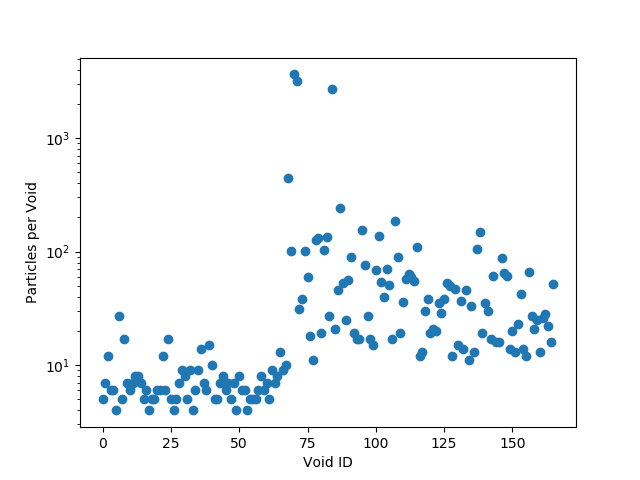

In [4]:
plt.scatter( Void_N_Particles[:,0], Void_N_Particles[:,1])
plt.yscale("log")

plt.ylabel("Particles per Void")
plt.xlabel("Void ID")

plt.show()

In [5]:
def PlotVoidInCatalog(ID, s=10):

    index = np.where( VoidParticleCat[:,0] == ID )[0]

    X = VoidParticleCat[index,1]
    Y = VoidParticleCat[index,2]
    Z = VoidParticleCat[index,3]

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)
    ax.set_zlim(-100,100)
    
    ax.scatter( 0, 0, 0 )
    ax.scatter( X, Y, Z,  s=s, c = "blue" )

    
    x = OC[:,0]
    y = OC[:,1]
    z = OC[:,2]
    ax.scatter( x, y, z,  s=0.01, c = "red" )

        
    ax.view_init(15, 30)

    plt.title("Void Tagging\nUsing RandomPoints & 1-Skeleton")
    plt.tight_layout()


    #plt.savefig("./tagging_voids.pdf", format="pdf")
    #plt.close()

    plt.show()
    
def PlotVoidParticles(ID, s=20):

    index = np.where( VoidParticleCat[:,0] == ID)[0]
    Void_ID = VoidParticleCat[index, 1:4]
    
    x = Void_ID[:,0]
    y = Void_ID[:,1]
    z = Void_ID[:,2]

    print("Number of particles = ", x.shape[0])
    
    x_c = x.mean()
    y_c = y.mean()
    z_c = z.mean()

    x -= x.mean()
    y -= y.mean()
    z -= z.mean()

    for i in range( x.shape[0]):
        print(x[i], y[i], z[i])
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')      
    ax.view_init(15, 30)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    ax.scatter(x,y,z)
    
    plt.show()

<IPython.core.display.Javascript object>


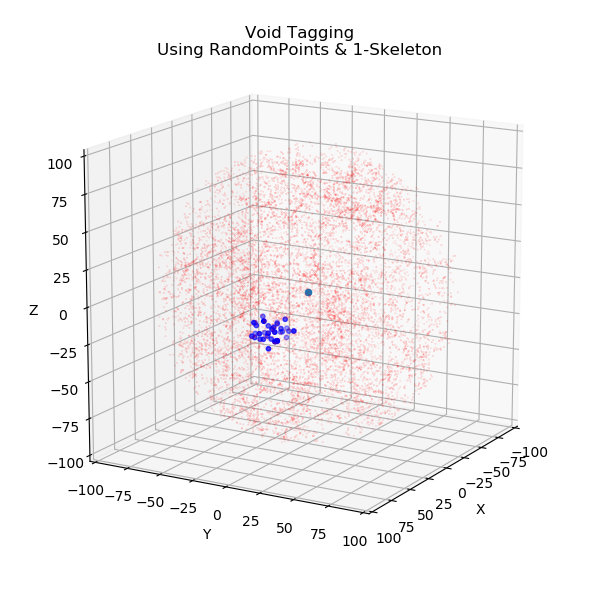

In [11]:
ID = 123

PlotVoidInCatalog(ID, 10)

index = np.where( VoidParticleCat[:,0] == ID)[0]
Void_n = VoidParticleCat[index, 1:4]
particles_void_N = Void_n.shape[0]

###########################################
#       Move to center of mass
#           frame of reference.
x = Void_n[:,0]
y = Void_n[:,1]
z = Void_n[:,2]

x_c = x.mean()
y_c = y.mean()
z_c = z.mean()

x -= x.mean()
y -= y.mean()
z -= z.mean()
#
###########################################


##########################################
#        Calcule Inertia Tensor
#              for Void Particles.
I_11 = 0
I_22 = 0
I_33 = 0

I_12 = 0
I_13 = 0
I_23 = 0

for k in range( particles_void_N ):
    I_11 += y[k]**2 + z[k]**2
    I_22 += z[k]**2 + x[k]**2
    I_33 += x[k]**2 + y[k]**2

    I_12 += - x[k] * y[k]
    I_13 += - z[k] * x[k]
    I_23 += - y[k] * z[k]
    
I_21 = I_12
I_31 = I_13
I_32 = I_23

I = np.array([
    [I_11, I_12, I_13],
    [I_21, I_22, I_23],
    [I_31, I_32, I_33]])

I = I/particles_void_N  # mass = \sum_1^N 1 / N = 1
#
###################################################


###################################################
#   Eigenvalues (w[i])
#          and
#   EigenVector  (v[i])
#
w, v = np.linalg.eig(I)


w_max_index = np.where(w == w.max())[0]
w_min_index = np.where(w == w.min())[0]
w_med_index = np.where( (w != w.max()) & (w != w.min()))[0]


# Sort semiaxes by length.
# a - major semi-axis
# b - med. semi-axis
# c - minor semi-axis

I_a = w[ w_min_index[0] ]
I_b = w[ w_med_index[0] ]
I_c = w[ w_max_index[0] ]

a = ((5.0/2.0)*( -I_a + I_b + I_c))**0.5
b = ((5.0/2.0)*( +I_a - I_b + I_c))**0.5
c = ((5.0/2.0)*( +I_a + I_b - I_c))**0.5

axis_a = v[:, w_min_index]
axis_b = v[:, w_med_index]
axis_c = v[:, w_max_index]
#
##################################################




In [13]:
V = (4.0 / 3.0) * np.pi * a * b * c

In [14]:
ID, a, b, c, axis_a, axis_b, axis_c, V

(123,
 15.580985302144597,
 10.868906976901728,
 7.624623024030814,
 array([[ 0.56132806],
        [-0.82567052],
        [ 0.05638261]]),
 array([[-0.51314743],
        [-0.29379045],
        [ 0.80645328]]),
 array([[-0.64930002],
        [-0.48161745],
        [-0.58860353]]),
 5408.636257628239)